# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,186-9-105--Spectrum--051--Spec.Data 1_CRR_DiadFit,103.496980,0.045230,1285.435260,0.042038,71.219441,1285.435260,173.133378,0.846913,3.339381,...,1.073314,0.418051,0.023783,1.104348,1.035417,0.123143,0.008336,PseudoVoigtModel,PseudoVoigtModel,No
1,186-9-105--Spectrum--052--Spec.Data 1_CRR_DiadFit,103.488739,0.034668,1285.439424,0.032266,88.663449,1285.439424,208.125364,0.866294,2.955416,...,1.064935,0.060206,0.019541,1.235669,1.274194,0.266744,0.006463,PseudoVoigtModel,PseudoVoigtModel,No
2,186-9-105--Spectrum--053--Spec.Data 1,103.548806,0.018921,1285.391967,0.016956,128.621585,1285.391967,290.725474,0.769511,2.703620,...,1.267007,0.354880,0.011965,1.162921,1.130261,0.208397,0.005519,PseudoVoigtModel,PseudoVoigtModel,No
3,186-9-107--Spectrum--081--Spec.Data 1,103.535197,0.044277,1285.536879,0.040815,30.846052,1285.536879,61.707976,0.837386,1.372083,...,1.036164,0.118899,0.054295,1.038123,1.014862,0.043656,0.019470,PseudoVoigtModel,PseudoVoigtModel,No
4,186-9-107--Spectrum--082--Spec.Data 1,103.438869,0.038047,1285.600322,0.035472,38.330787,1285.600322,72.920925,0.605556,1.364394,...,1.153457,0.069103,0.031596,1.015060,1.024123,0.016889,0.014808,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'019 FG04-A1-1--Spectrum--019--Information.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 47/47 [00:10<00:00,  4.63it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-1--Spectrum--019--Information.txt,"May 28, 2024\n",May,28.0,6.076,45.0,5.0,50.0,"['0h', '3m', '46s']",11:00:06 AM\n,39606.0,1324.964
1,FG04-A1-1--Spectrum--020--Information.txt,"May 28, 2024\n",May,28.0,6.045,45.0,5.0,50.0,"['0h', '3m', '46s']",11:04:16 AM\n,39856.0,1324.964
2,FG04-A1-1--Spectrum--021--Information.txt,"May 28, 2024\n",May,28.0,6.009,45.0,5.0,50.0,"['0h', '3m', '46s']",11:08:56 AM\n,40136.0,1324.964
3,FG04-A1-2--Spectrum--023--Information.txt,"May 28, 2024\n",May,28.0,6.003,45.0,5.0,50.0,"['0h', '3m', '46s']",11:16:10 AM\n,40570.0,1324.964
4,FG04-A1-2--Spectrum--024--Information.txt,"May 28, 2024\n",May,28.0,6.062,45.0,5.0,50.0,"['0h', '3m', '46s']",11:22:56 AM\n,40976.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-1--Spectrum--019--Information'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-1--Spectrum--019', 'FG04-A1-1--Spectrum--020',
       'FG04-A1-1--Spectrum--021', 'FG04-A1-2--Spectrum--023',
       'FG04-A1-2--Spectrum--024', 'FG04-A1-2--Spectrum--025',
       'FG04-A1-4--Spectrum--027', 'FG04-A1-4--Spectrum--028',
       'FG04-A1-4--Spectrum--029', 'FG19-101-A--Spectrum--042',
       'FG19-101-A--Spectrum--043', 'FG19-101-A--Spectrum--044',
       '186-9-105--Spectrum--051', '186-9-105--Spectrum--052',
       '186-9-105--Spectrum--053', '186-9-106--Spectrum--059',
       '186-9-106--Spectrum--060', '186-9-106--Spectrum--061',
       '186-9-107--Spectrum--081', '186-9-107--Spectrum--082',
       '186-9-107--Spectrum--083', '186-9-107--Spectrum--084',
       '186-9-107--Spectrum--085', '186-9-108-A--Spectrum--094',
       '186-9-108-A--Spectrum--095', '186-9-108-A--Spectrum--096',
       '186-9-108-B--Spectrum--099', '186-9-108-B--Spectrum--101',
       '186-9-108-B--Spectrum--102', '186-9-109--Spectrum--112',
       '186-9-109--Spectrum--113', '186-

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
186-9-105--Spectrum--051--Spec.Data 1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['186-9-105--Spectrum--051', '186-9-105--Spectrum--052',
       '186-9-105--Spectrum--053', '186-9-107--Spectrum--081',
       '186-9-107--Spectrum--082', '186-9-107--Spectrum--083',
       '186-9-107--Spectrum--084', '186-9-107--Spectrum--085',
       '186-9-108-A--Spectrum--094', '186-9-108-A--Spectrum--095',
       '186-9-108-A--Spectrum--096', '186-9-108-B--Spectrum--099',
       '186-9-108-B--Spectrum--101', '186-9-108-B--Spectrum--102',
       '186-9-109--Spectrum--112', '186-9-109--Spectrum--113',
       '186-9-109--Spectrum--114', '186-9-110--Spectrum--120',
       '186-9-111-A--Spectrum--127', '186-9-111-A--Spectrum--128',
       '186-9-111-A--Spectrum--129', '186-9-112-A--Spectrum--136',
       '186-9-113-A--Spectrum--141', '186-9-113-A--Spectrum--142',
       '186-9-113-B--Spectrum--144', '186-9-113-C--Spectrum--146',
       '186-9-106--Spectrum--059', '186-9-106--Spectrum--060',
       '186-9-106--Spectrum--061', '186-9-112-A--Spectrum--137',
       'FG04-A1-1--Spectr

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,186-9-105--Spectrum--051,103.496980,0.045230,1285.435260,0.042038,71.219441,1285.435260,173.133378,0.846913,3.339381,...,May,28.0,6.015,60.0,4.0,50.0,"['0h', '4m', '2s']",12:36:28 PM\n,45388.0,1324.964
1,186-9-105--Spectrum--052,103.488739,0.034668,1285.439424,0.032266,88.663449,1285.439424,208.125364,0.866294,2.955416,...,May,28.0,6.032,60.0,4.0,50.0,"['0h', '4m', '1s']",12:43:59 PM\n,45839.0,1324.964
2,186-9-105--Spectrum--053,103.548806,0.018921,1285.391967,0.016956,128.621585,1285.391967,290.725474,0.769511,2.703620,...,May,28.0,6.034,60.0,4.0,50.0,"['0h', '4m', '1s']",12:48:22 PM\n,46102.0,1324.964
3,186-9-107--Spectrum--081,103.535197,0.044277,1285.536879,0.040815,30.846052,1285.536879,61.707976,0.837386,1.372083,...,May,28.0,6.118,45.0,3.0,100.0,"['0h', '2m', '16s']",2:41:22 PM\n,52882.0,1324.964
4,186-9-107--Spectrum--082,103.438869,0.038047,1285.600322,0.035472,38.330787,1285.600322,72.920925,0.605556,1.364394,...,May,28.0,6.114,45.0,3.0,100.0,"['0h', '2m', '16s']",2:45:25 PM\n,53125.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

9.21452173225167e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,186-9-105--Spectrum--051,0.218463,0.018742,0.018592,0.002363,103.288243,0.045149,0.000924,0.045230,6.015,...,60.0,4.0,50.0,"['0h', '4m', '2s']",12:36:28 PM\n,45388.0,45388.0,0.997983,0.997974,0.997992
1,186-9-105--Spectrum--052,0.215013,0.014430,0.014236,0.002364,103.279860,0.034610,0.000922,0.034668,6.032,...,60.0,4.0,50.0,"['0h', '4m', '1s']",12:43:59 PM\n,45839.0,45839.0,0.997982,0.997973,0.997991
2,186-9-105--Spectrum--053,0.239736,0.008190,0.007843,0.002360,103.339715,0.018906,0.000922,0.018921,6.034,...,60.0,4.0,50.0,"['0h', '4m', '1s']",12:48:22 PM\n,46102.0,46102.0,0.997981,0.997972,0.997990
3,186-9-107--Spectrum--081,0.233327,0.018445,0.018294,0.002361,103.324248,0.044197,0.000923,0.044277,6.118,...,45.0,3.0,100.0,"['0h', '2m', '16s']",2:41:22 PM\n,52882.0,52882.0,0.997963,0.997954,0.997971
4,186-9-107--Spectrum--082,0.193785,0.015694,0.015514,0.002368,103.228065,0.037981,0.000923,0.038047,6.114,...,45.0,3.0,100.0,"['0h', '2m', '16s']",2:45:25 PM\n,53125.0,53125.0,0.997962,0.997953,0.997971


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

9.21452173225167e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,186-9-105--Spectrum--051,0.218463,0.018742,0.018592,0.002363,103.288243,0.045149,0.000924,0.045230,6.015,...,60.0,4.0,50.0,"['0h', '4m', '2s']",12:36:28 PM\n,45388.0,45388.0,0.997983,0.997974,0.997992
1,186-9-105--Spectrum--052,0.215013,0.014430,0.014236,0.002364,103.279860,0.034610,0.000922,0.034668,6.032,...,60.0,4.0,50.0,"['0h', '4m', '1s']",12:43:59 PM\n,45839.0,45839.0,0.997982,0.997973,0.997991
2,186-9-105--Spectrum--053,0.239736,0.008190,0.007843,0.002360,103.339715,0.018906,0.000922,0.018921,6.034,...,60.0,4.0,50.0,"['0h', '4m', '1s']",12:48:22 PM\n,46102.0,46102.0,0.997981,0.997972,0.997990
3,186-9-107--Spectrum--081,0.233327,0.018445,0.018294,0.002361,103.324248,0.044197,0.000923,0.044277,6.118,...,45.0,3.0,100.0,"['0h', '2m', '16s']",2:41:22 PM\n,52882.0,52882.0,0.997963,0.997954,0.997971
4,186-9-107--Spectrum--082,0.193785,0.015694,0.015514,0.002368,103.228065,0.037981,0.000923,0.038047,6.114,...,45.0,3.0,100.0,"['0h', '2m', '16s']",2:45:25 PM\n,53125.0,53125.0,0.997962,0.997953,0.997971


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_May 28, 2024_fitted_2024-07-08.xlsx


## This helps visualize the errors on each spectra 

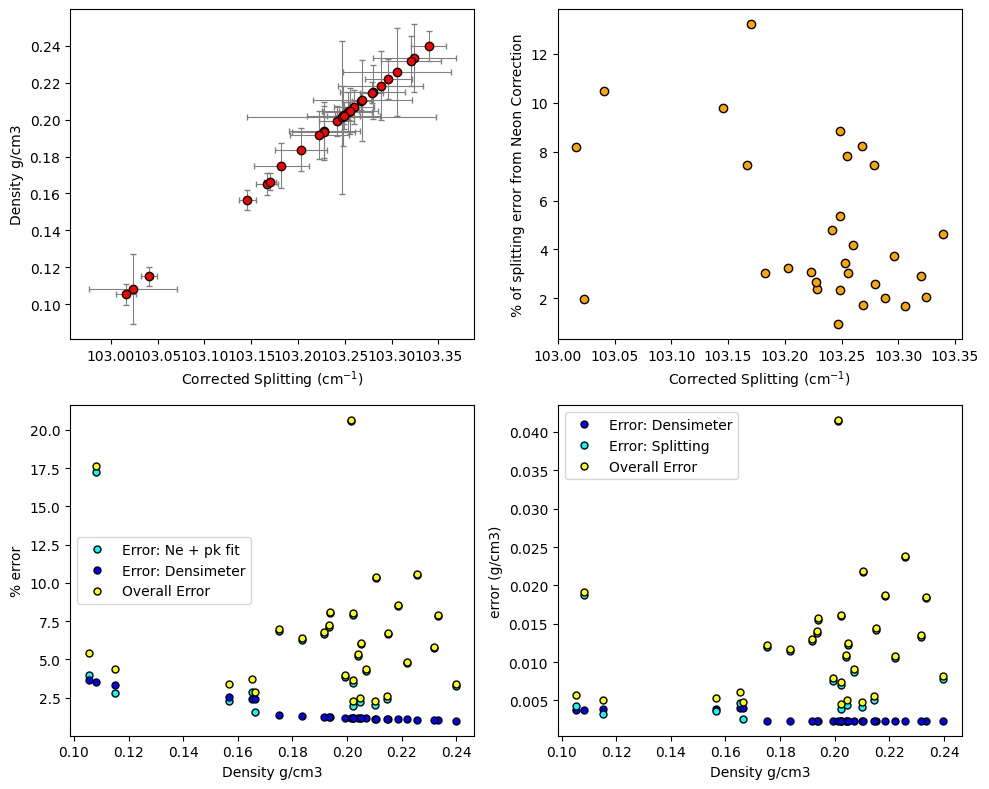

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

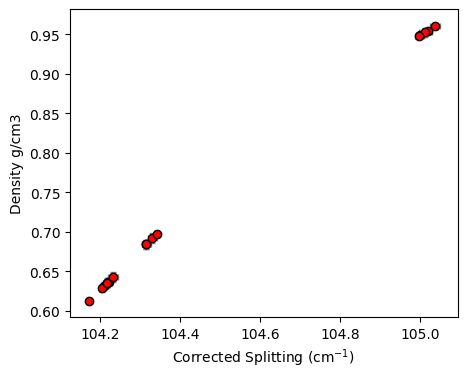

In [21]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [22]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

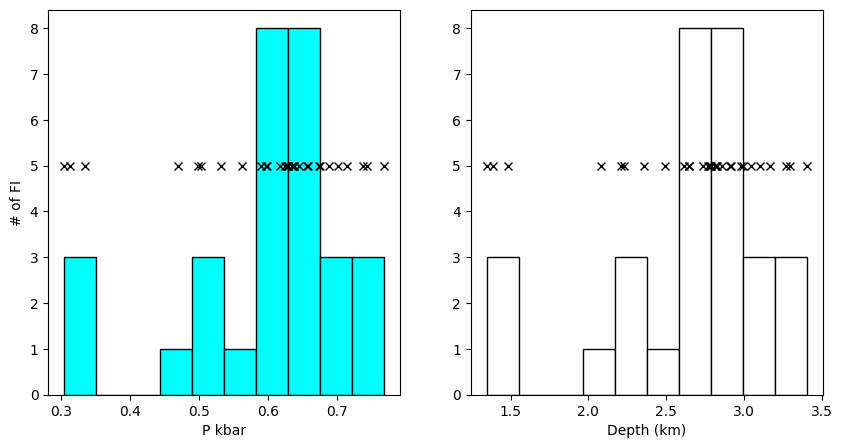

In [19]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [20]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3b_Secondary_Peaks is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()